# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [ ]:
# Install the required libraries
!pip install prophet

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [ ]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-3-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [ ]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


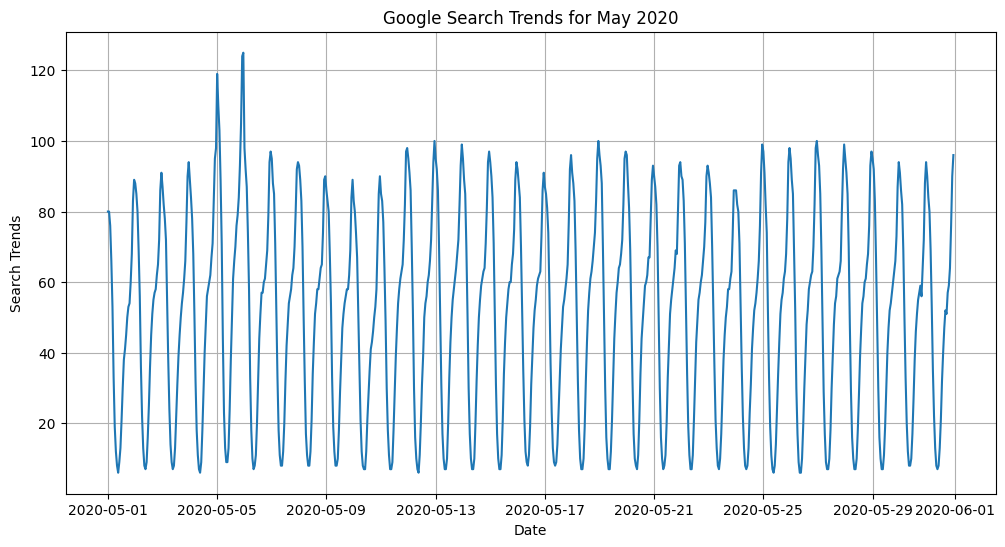

In [ ]:
# Slice the DataFrame to just the month of May 2020
may_2020_data = df_mercado_trends.loc['2020-05-01':'2020-05-31']
may_2020_data
# Plot to visualize the data for May 2020
plt.figure(figsize=(12, 6))
plt.plot(may_2020_data.index, may_2020_data.iloc[:, 0])  # Adjusting in case there are multiple columns
plt.title('Google Search Trends for May 2020')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.grid(True)
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [ ]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = may_2020_data['Search Trends'].sum()

# View the traffic_may_2020 value
print(traffic_may_2020)


38181


In [ ]:
# Calcluate the monhtly median search traffic across all months

# Group by year and month, then calculate the median search traffic for each month
monthly_median_traffic = df_mercado_trends.resample('M').median()

# Display the median value for each month
print(monthly_median_traffic)


            Search Trends
Date                     
2016-06-30           50.0
2016-07-31           48.5
2016-08-31           50.0
2016-09-30           47.0
2016-10-31           45.0
2016-11-30           51.0
2016-12-31           48.0
2017-01-31           47.0
2017-02-28           51.0
2017-03-31           51.0
2017-04-30           47.0
2017-05-31           47.0
2017-06-30           50.5
2017-07-31           49.0
2017-08-31           51.0
2017-09-30           49.0
2017-10-31           44.0
2017-11-30           51.0
2017-12-31           50.0
2018-01-31           54.0
2018-02-28           53.0
2018-03-31           51.0
2018-04-30           52.0
2018-05-31           49.0
2018-06-30           49.0
2018-07-31           51.5
2018-08-31           54.0
2018-09-30           51.0
2018-10-31           52.0
2018-11-30           50.0
2018-12-31           51.0
2019-01-31           57.0
2019-02-28           56.0
2019-03-31           54.0
2019-04-30           54.0
2019-05-31           50.0
2019-06-30  

In [ ]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
overall_median_traffic = monthly_median_traffic['Search Trends'].median()
print(overall_median_traffic,traffic_may_2020)

# Calculate the ratio of May 2020's traffic to the overall median
comparison = traffic_may_2020 / overall_median_traffic


# Display the comparison
print(comparison)

51.0 38181
748.6470588235294


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**
No, the Google search traffic did not increase during the month that MercadoLibre released its financial results; it was actually lower than the typical monthly median based on the comparison value provided. This suggests less interest or fewer searches than average during that period, contrary to what might be expected during a financial announcement.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

<ipython-input-34-203a32c398b2>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv", index_col='Date', parse_dates=True)


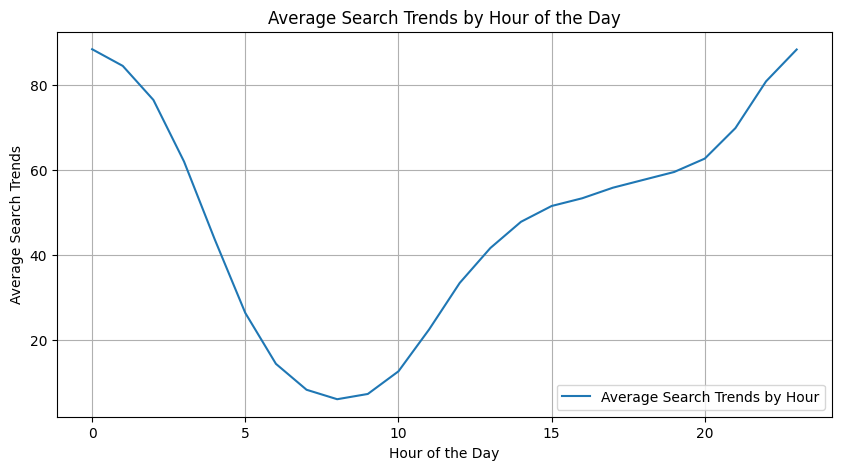

In [ ]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`

# Group by hour of the day and calculate the mean
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv", index_col='Date', parse_dates=True)

# Group by hour of the day and calculate the mean
hourly_average = df.groupby(df.index.hour).mean()

# Plotting the result
plt.figure(figsize=(10, 5))
plt.plot(hourly_average.index, hourly_average['Search Trends'], label='Average Search Trends by Hour')
plt.title('Average Search Trends by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Search Trends')
plt.grid(True)
plt.legend()
plt.show()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

<ipython-input-35-50d059e89da3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv", index_col='Date', parse_dates=True)


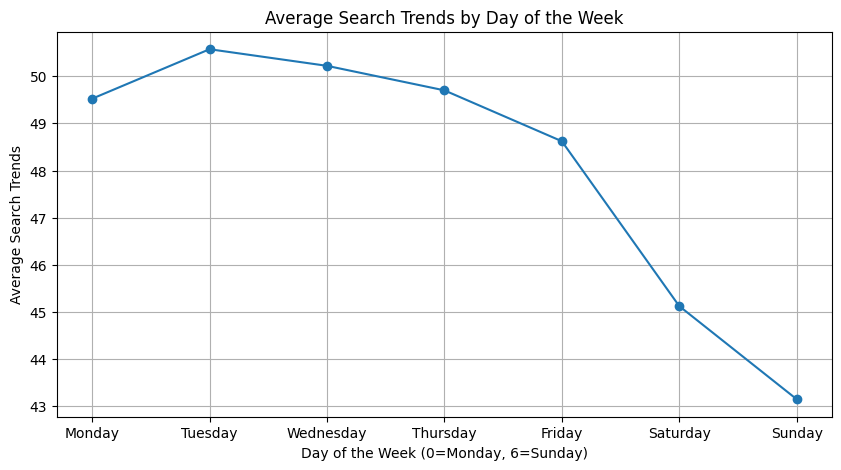

In [ ]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv", index_col='Date', parse_dates=True)

# Group by day of the week and calculate the mean
# Note: The day of the week is represented as 0=Monday, 6=Sunday
weekly_average = df.groupby(df.index.dayofweek).mean()

# Plotting the result
plt.figure(figsize=(10, 5))
plt.plot(weekly_average.index, weekly_average['Search Trends'], marker='o', linestyle='-')
plt.title('Average Search Trends by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Search Trends')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()


#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

<ipython-input-36-404f2b4fad28>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv", index_col='Date', parse_dates=True)


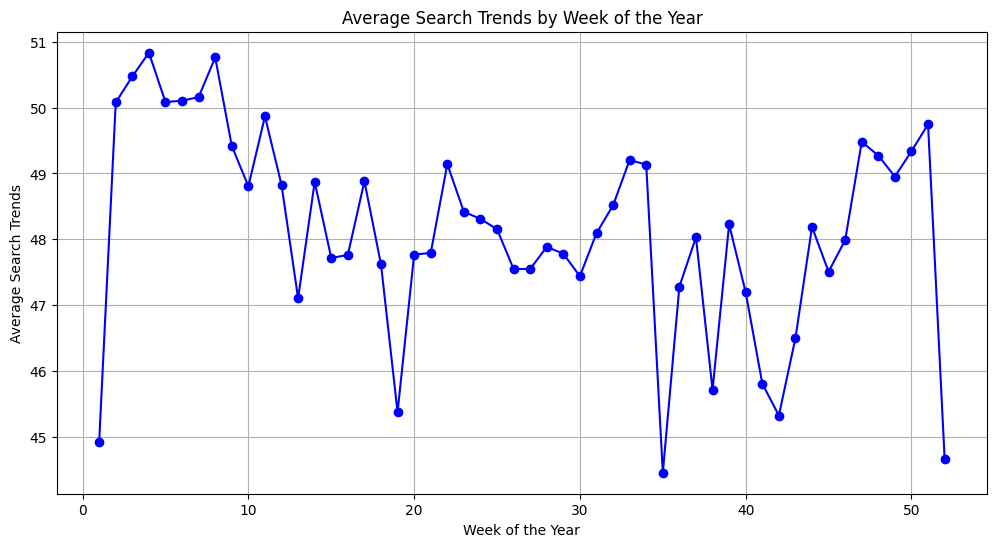

In [ ]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv", index_col='Date', parse_dates=True)

# Group by week of the year and calculate the mean
weekly_average = df.groupby(df.index.isocalendar().week).mean()

# Plotting the result
plt.figure(figsize=(12, 6))
plt.plot(weekly_average.index, weekly_average['Search Trends'], marker='o', linestyle='-', color='blue')
plt.title('Average Search Trends by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Search Trends')
plt.grid(True)
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**
The graph indicates that search traffic is not consistent throughout the year; it varies from week to week. This variability is typical of search data, where user interest can be influenced by seasonal events, product releases, marketing campaigns, and other time-sensitive factors.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [ ]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


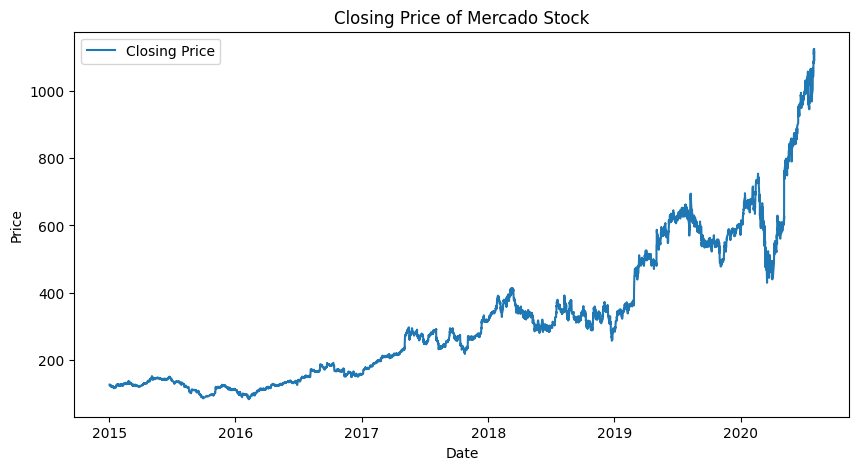

In [ ]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# Plotting the closing price directly from the index
plt.figure(figsize=(10, 5))
plt.plot(df_mercado_stock['close'], label='Closing Price')  # No need to re-specify date handling
plt.title('Closing Price of Mercado Stock')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data


# View the first and last five rows of the DataFrame

# df_mercado_stock_price = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv", parse_dates=['date'], index_col='date')
# df_mercado_trends_data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv", parse_dates=['date'], index_col='date')

# Concatenate the DataFrames
df_combined = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna(how='any')

# Display the first and last five rows of the combined DataFrame
print(df_combined.head())  # First five rows
print(df_combined.tail())  # Last five rows

                      close  Search Trends
2016-06-01 09:00:00  135.16            6.0
2016-06-01 10:00:00  136.63           12.0
2016-06-01 11:00:00  136.56           22.0
2016-06-01 12:00:00  136.42           33.0
2016-06-01 13:00:00  136.10           40.0
                        close  Search Trends
2020-07-31 11:00:00  1105.780           20.0
2020-07-31 12:00:00  1087.925           32.0
2020-07-31 13:00:00  1095.800           41.0
2020-07-31 14:00:00  1110.650           47.0
2020-07-31 15:00:00  1122.510           53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [ ]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_combined.loc['2020-01-01':'2020-06-30']

# View the first and last five rows of first_half_2020 DataFrame
print("First five rows of first_half_2020:")
print(first_half_2020.head())
print("\nLast five rows of first_half_2020:")
print(first_half_2020.tail())

First five rows of first_half_2020:
                       close  Search Trends
2020-01-02 09:00:00  601.085            9.0
2020-01-02 10:00:00  601.290           14.0
2020-01-02 11:00:00  615.410           25.0
2020-01-02 12:00:00  611.400           37.0
2020-01-02 13:00:00  611.830           50.0

Last five rows of first_half_2020:
                      close  Search Trends
2020-06-30 11:00:00  976.17           17.0
2020-06-30 12:00:00  977.50           27.0
2020-06-30 13:00:00  973.23           37.0
2020-06-30 14:00:00  976.50           45.0
2020-06-30 15:00:00  984.93           51.0


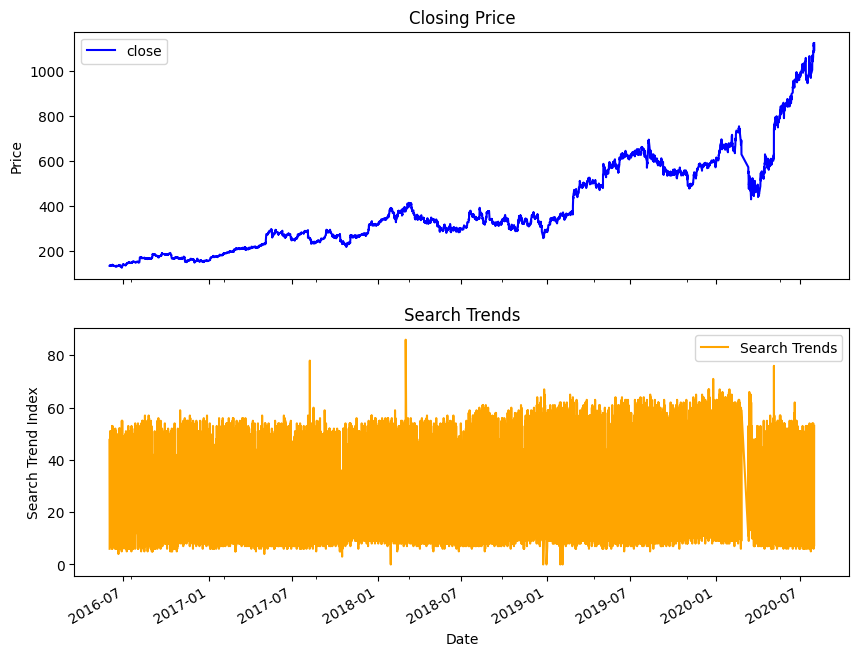

In [ ]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
axs = df_combined[['close', 'Search Trends']].plot(subplots=True, figsize=(10, 8), color=['blue', 'orange'])

# Setting labels and titles for each subplot
axs[0].set_title('Closing Price')
axs[0].set_ylabel('Price')
axs[1].set_title('Search Trends')
axs[1].set_ylabel('Search Trend Index')
axs[1].set_xlabel('Date')

# Display the plots
plt.show()

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**

Closing Price: The stock price chart shows a general upward trend over time, with some periods of volatility and a notable sharp rise towards the end of the observed period.

Search Trends: The search trend data also shows fluctuations but lacks the strong upward trajectory seen in the stock price. Instead, it seems relatively stable with some spikes that do not appear to consistently correspond with the peaks or troughs in the stock price.

While there are moments when spikes in search trends may align with movements in stock prices, the overall patterns in the two series do not exhibit a consistently strong or direct correlation. Thus, based on this visual analysis, the time series do not indicate a common trend that consistently matches across both metrics throughout the entire period observed. These observations suggest that search trend data alone might not be a reliable predictor of stock price movements for this particular dataset.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
# Assuming df_combined has 'Search Trends' and 'close' columns

df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(-1)  # Shift by one hour
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()  # Calculates the percentage change





In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window

df_combined['Stock Volatility EWMA'] = df_combined['Hourly Stock Return'].ewm(span=4).std()  # Exponentially weighted moving standard deviation
df_combined['Stock Volatility'] = df_combined['Hourly Stock Return'].rolling(window=4).std()  # Standard deviation over a rolling window

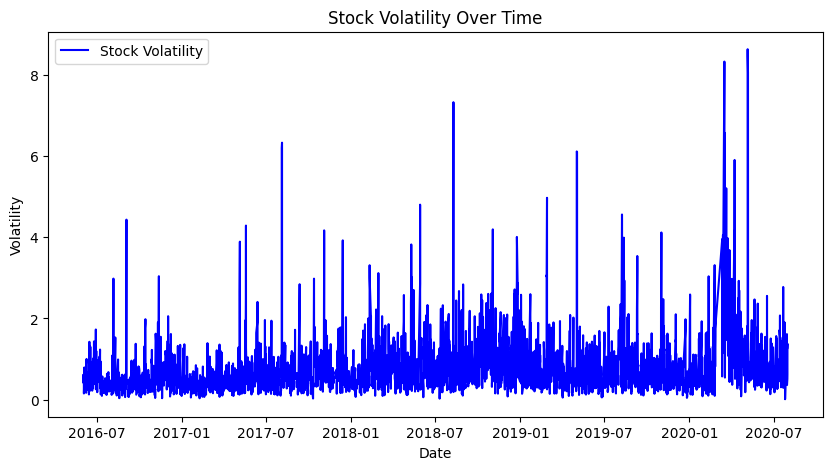

In [ ]:
# Visualize the stock volatility
plt.figure(figsize=(10, 5))
plt.plot(df_combined['Stock Volatility'], color='blue', label='Stock Volatility')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price

df_combined['Hourly Stock Return'] = df_combined['close'].pct_change() * 100
df_combined['Hourly Stock Return'].fillna(0, inplace=True)


In [ ]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
df_combined.head()


,close,Search Trends,Lagged Search Trends,Hourly Stock Return,Stock Volatility EWMA,Stock Volatility
2016-06-01 09:00:00,135.16,6.0,12.0,0.000000,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,22.0,1.087600,0.769049,NaN
2016-06-01 11:00:00,136.56,22.0,33.0,-0.051233,0.663238,NaN
2016-06-01 12:00:00,136.42,33.0,40.0,-0.102519,0.526356,0.570961
2016-06-01 13:00:00,136.10,40.0,45.0,-0.234570,0.439353,0.613401


In [ ]:
df_combined.tail()

,close,Search Trends,Lagged Search Trends,Hourly Stock Return,Stock Volatility EWMA,Stock Volatility
2020-07-31 11:00:00,1105.780,20.0,32.0,0.637986,1.248616,1.283697
2020-07-31 12:00:00,1087.925,32.0,41.0,-1.614697,1.317476,1.354852
2020-07-31 13:00:00,1095.800,41.0,47.0,0.723855,1.288190,1.329459
2020-07-31 14:00:00,1110.650,47.0,53.0,1.355174,1.297140,1.300123
2020-07-31 15:00:00,1122.510,53.0,NaN,1.067843,1.059054,1.356602


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [ ]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
relevant_columns = df_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']]

# Calculate the correlation matrix
correlation_matrix = relevant_columns.corr()

# Display the correlation matrix
correlation_matrix

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.015655,0.061424
Lagged Search Trends,-0.015655,1.000000,-0.016672
Hourly Stock Return,0.061424,-0.016672,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**
The correlation coefficients indicate that there is no predictable relationship between lagged search traffic and stock volatility, nor between lagged search traffic and stock price returns, within the data provided. The values are so small that any relationship is likely to be statistically insignificant, suggesting that movements in search trends do not reliably predict or affect changes in stock volatility or returns in this scenario.

For practical analysis, this could imply that other factors not captured in this data may have a more substantial influence on stock volatility and returns, and that lagged search trends may not be a reliable indicator for forecasting these stock metrics.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [ ]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()
prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df.columns = ['ds', 'y']

# Drop an NaN values from the prophet_df_mercado_trends DataFrame
prophet_df = prophet_df.dropna()

prophet_df

<ipython-input-12-a335cae7e5b2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38
...,...,...
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97


In [ ]:
# Call the Prophet function, store as an object
model = Prophet()


In [ ]:
# Fit the time-series model.
model.fit(prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3z08gfr/vw8gaftz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3z08gfr/03060pv2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36095', 'data', 'file=/tmp/tmpr3z08gfr/vw8gaftz.json', 'init=/tmp/tmpr3z08gfr/03060pv2.json', 'output', 'file=/tmp/tmpr3z08gfr/prophet_modelf49ug8r7/prophet_model-20240509105944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:59:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:00:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future = model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
display(future.tail(5))

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [ ]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast = model.predict(future)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast.head(5))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,81.123889,98.116673,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,77.440004,94.305215,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,67.283288,84.017390,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,51.251073,68.648208,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,34.204916,51.736438,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

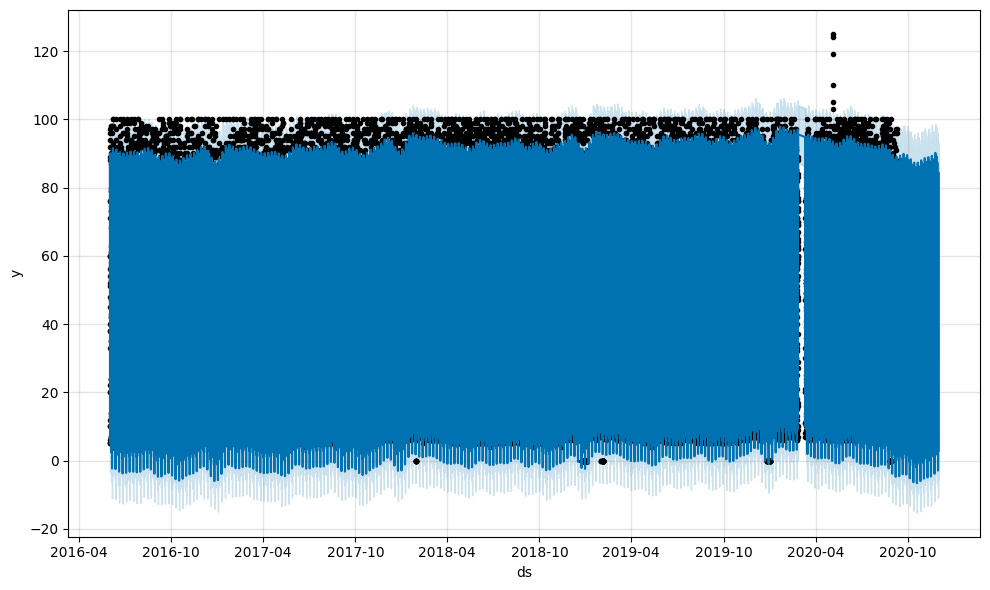

In [ ]:
# Plot the Prophet predictions for the Mercado trends data
# Plot the forecast with Prophet's built-in plot function
fig = model.plot(forecast)
plt.show()

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** The near-term forecast for the popularity of MercadoLibre, based on the Prophet model's prediction that you've shared, suggests a stable outlook. The forecast indicates that the search trends or popularity of MercadoLibre are expected to continue at a relatively constant level, similar to the most recent historical data observed.

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [ ]:

# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast.set_index('ds', inplace=True)

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame

show_three_columns = forecast[['yhat', 'yhat_lower', 'yhat_upper']].head(5)
show_three_columns

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.123889,98.116673
2016-06-01 01:00:00,86.075935,77.440004,94.305215
2016-06-01 02:00:00,75.753361,67.283288,84.017390
2016-06-01 03:00:00,60.487045,51.251073,68.648208
2016-06-01 04:00:00,43.373051,34.204916,51.736438


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

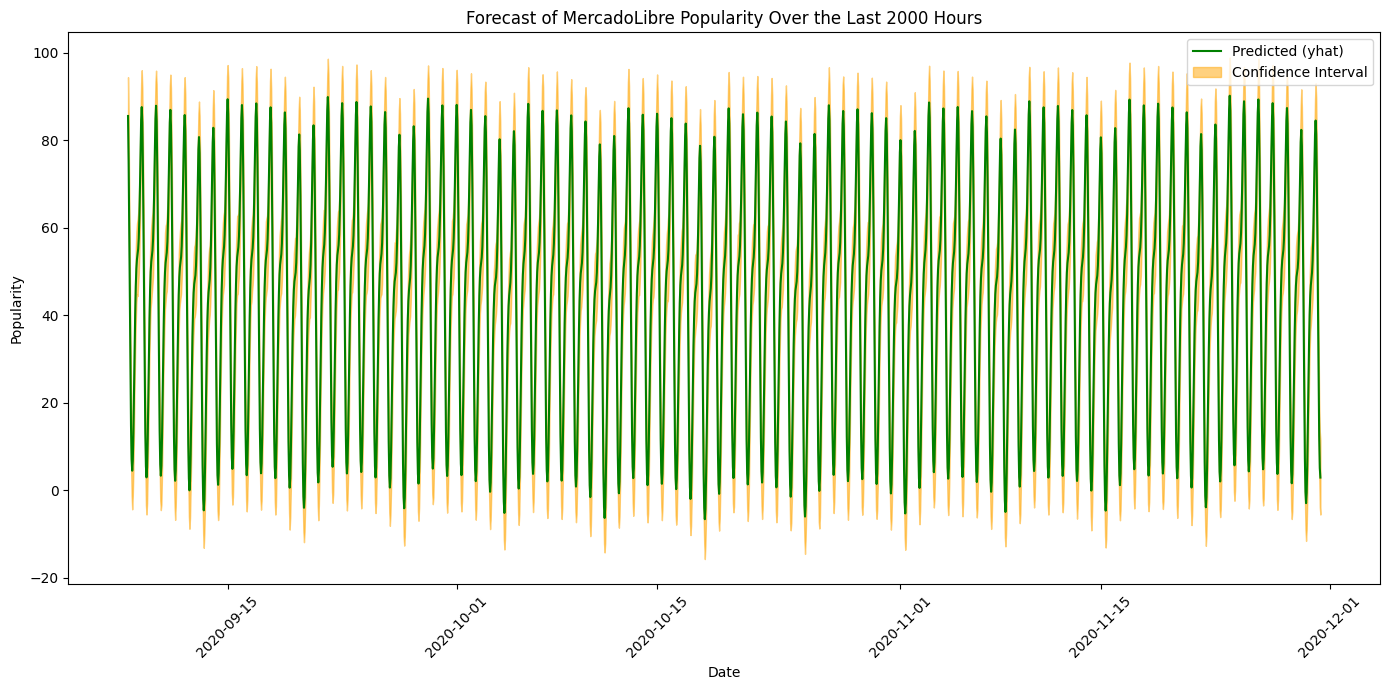

In [ ]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
# last_2000_hours = forecast.last('2000H')
# plt.figure(figsize=(10, 5))
# plt.plot(last_2000_hours.index, last_2000_hours['yhat'], label='Predicted (yhat)', color='green')
# plt.fill_between(last_2000_hours.index, last_2000_hours['yhat_lower'],last_2000_hours['yhat'], last_2000_hours['yhat_upper'], color='orange', alpha=0.3, label='Confidence Interval')
# plt.title('Forecast of MercadoLibre Popularity Over the Last 2000 Hours')
# plt.xlabel('Date')
# plt.ylabel('Popularity')
# plt.legend()
# plt.show()

last_2000_hours = forecast.last('2000H')

plt.figure(figsize=(14, 7))  # Adjust figure size for better visibility
plt.plot(last_2000_hours.index, last_2000_hours['yhat'], label='Predicted (yhat)', color='green')
plt.fill_between(last_2000_hours.index, last_2000_hours['yhat_lower'], last_2000_hours['yhat_upper'], color='orange', alpha=0.5, label='Confidence Interval')
plt.title('Forecast of MercadoLibre Popularity Over the Last 2000 Hours')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()



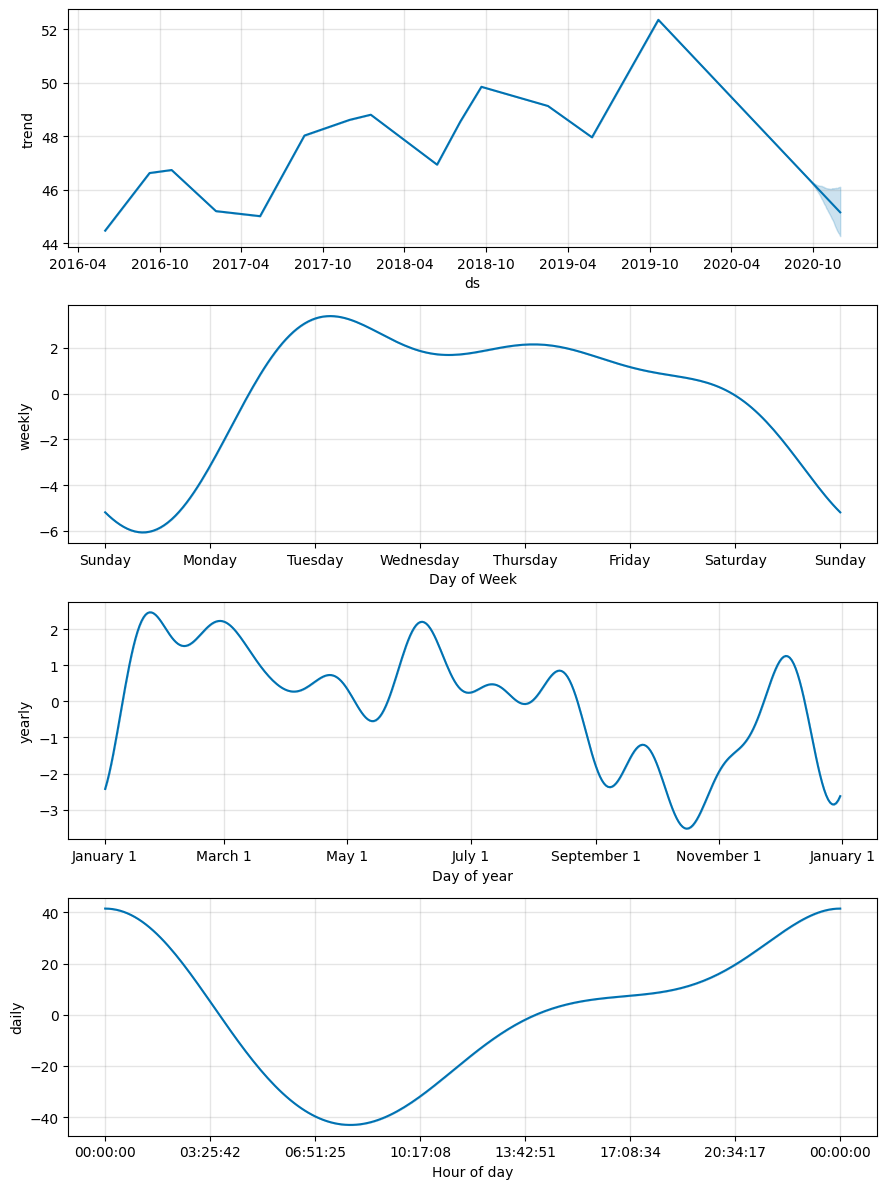

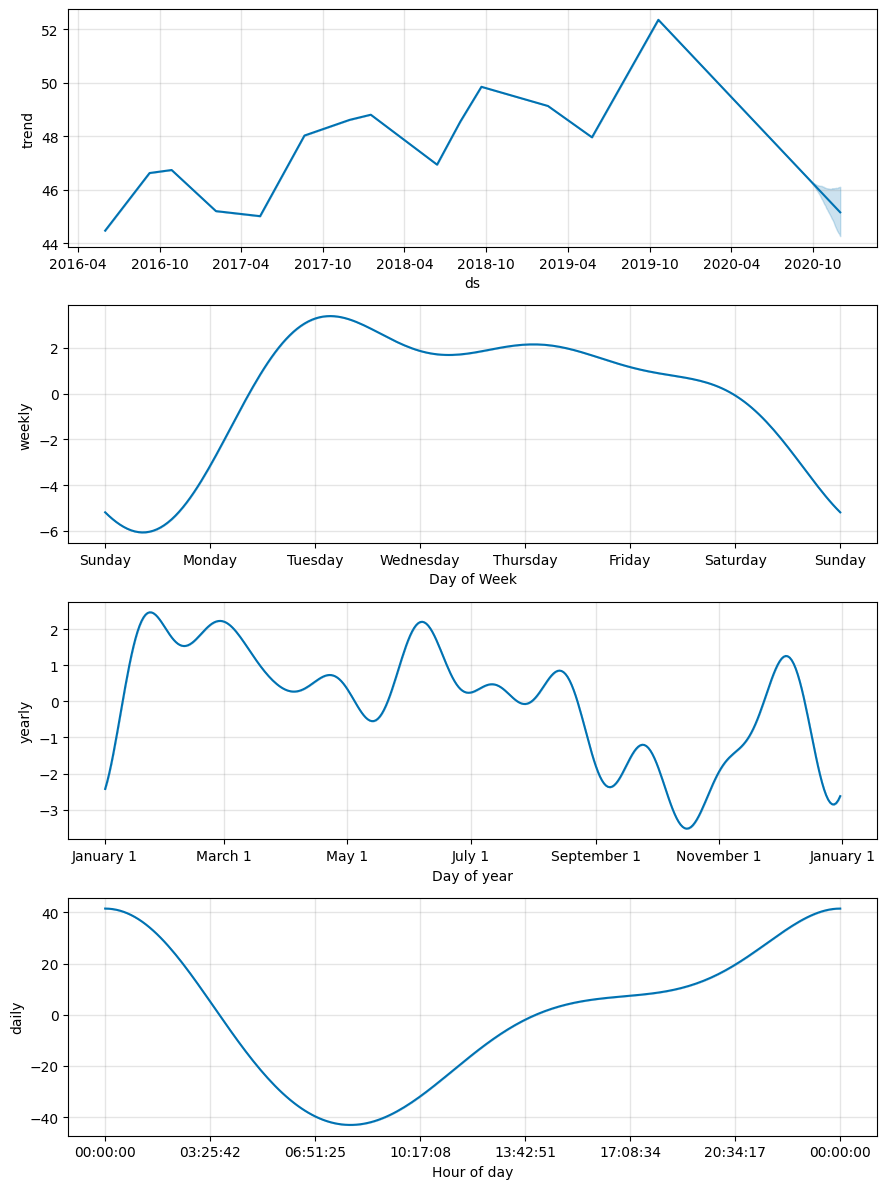

In [ ]:
from prophet.plot import plot_components
# Reset the index in the forecast_mercado_trends DataFrame
forecast.reset_index(inplace=True)

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame


plot_components(model, forecast)


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**
From the daily component plot, it appears that the greatest popularity occurs in the late evening. There is a significant increase starting in the late afternoon, peaking sometime after typical business hours. This might suggest increased user activity during these hours, possibly reflecting routine checking or shopping behavior after work.

**Question:** Which day of week gets the most search traffic?
   
**Answer:**
Tuesday is the day of the week with the most search traffic, according to the weekly component of your Prophet model forecast.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**
The lowest point for search traffic occurs around late November, as indicated by the significant dip in the yearly component plot. This might be due to factors such as holiday preparations or other seasonal behaviors affecting user engagement during this time.